In [85]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute
from qiskit.tools.visualization import circuit_drawer
from qiskit import Aer
import numpy as np
from qiskit.tools.visualization import plot_histogram, plot_state

In [60]:
# Create a Quantum Register with 3 qubits
qr = QuantumRegister(2)

# Create a Classical Register with 3 bits
cr = ClassicalRegister(2)

# Create a Quantum Circuit acting on the qr and cr register
circuit = QuantumCircuit(qr, cr)

circuit.h(qr[0])

# CNOT (Controlled-NOT) gate from qubit 0 to qubit 1
circuit.cx(qr[0], qr[1])

# measure gate from qr to cr
circuit.measure(qr,cr);
#circuit.measure(qr, cr);

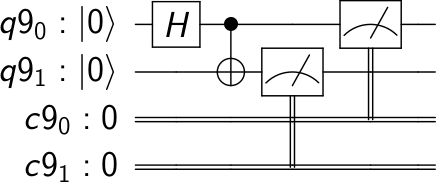

In [61]:
circuit_drawer(circuit)

In [62]:
backend = Aer.get_backend('qasm_simulator')

# Create a Quantum Program for execution 
job = execute(circuit, backend)

In [63]:
job.status()

<JobStatus.DONE: 'job has successfully run'>

In [64]:
result = job.result()

In [65]:
result.get_data()

{'counts': {'00': 500, '11': 524}}

In [66]:
backend = Aer.get_backend('statevector_simulator')
job = execute(circuit, backend)

state_superposition = job.result().get_statevector(circuit)

SimulatorError: 'In circuit circuit10: statevector simulator does not support measure or reset.'

In [76]:
n = 2  # number of qubits 
q = QuantumRegister(n)
c = ClassicalRegister(n)

qc = QuantumCircuit(q, c)
qc.h(q[0])
qc.cx(q[0], q[1])



# execute the quantum circuit 
backend = Aer.get_backend('statevector_simulator')
job = execute(qc, backend)
state_superposition = job.result().get_statevector(qc)
state_superposition

array([0.70710678+0.j, 0.        +0.j, 0.        +0.j, 0.70710678+0.j])

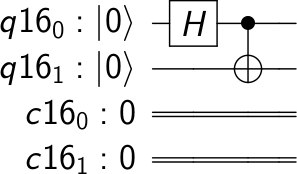

In [77]:
circuit_drawer(qc)

In [82]:
def state_2_rho(state):
    return np.outer(state, state.conj())

In [83]:
rho_superposition=state_2_rho(state_superposition)
print(rho_superposition)

[[0.5+0.j 0. +0.j 0. +0.j 0.5+0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0.5+0.j 0. +0.j 0. +0.j 0.5+0.j]]


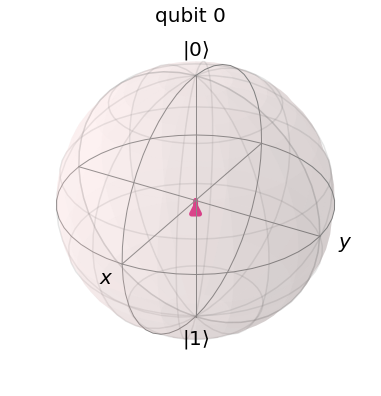

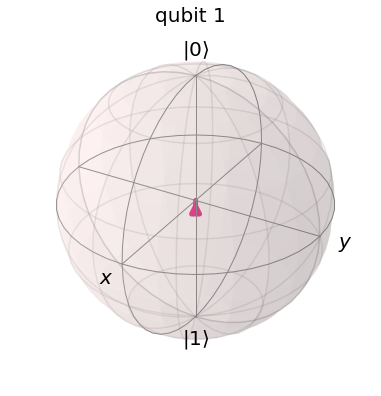

In [86]:
plot_state(rho_superposition,'bloch')